# Shrinkage and Dimension Reduction Methods

## Shrinkage Methods

The subset selection methods involve using least squares to fit a linear model that contains a subset of the predictors. As an alternative, we can fit a model containing all $p$ predictors using a technique that **constrains or regularizes** the coefficient estimates, or even **shrinks** the coefficient estimates towards zero.

### Ridge Regression

Recall that the least squares fitting procedure estimates $\beta$ values minimizing 

$$
RSS = \sum_{i = 1}^{n} \left( y_i - \beta_0 - \sum_{j = 1}^{p} \beta_j x_{ij} \right)^2
$$

Ridge regression is very similar to least squares, except that the coefficients $\hat{\beta}^R$ are estimated by minimizing 

$$
\sum_{i = 1}^{n} \left( y_i - \beta_0 - \sum_{j = 1}^{p} \beta_j x_{ij} \right)^2 + \lambda \sum_{j = 1}^{p} \beta_j^2 = RSS + \lambda \sum_{j = 1}^{p} \beta_j^2
$$

$\qquad$ where $\lambda \sum_{j = 1}^{p} \beta_j^2$ is the *penalty term*.

This penalty term is small when $\beta_1, ..., \beta_p$ are close to zero, and so it has the effect of shrinking the estimates of $\beta_j$ towards zero. 

The parameter $\lambda$ serves to control the relative impact of these two terms on the regression coefficient estimates. 

- When $\lambda = 0$ the penalty term has no effect, and Ridge regression will produce the least squares estimates.
- As $\lambda \rightarrow \infty$, the impact of the penalty grows, and the Ridge regression coefficient estimates will approach zero.

Ridge regression produce a different set of coefficient estimates for each value of $\lambda$. Thus, selecting a good value for $\lambda$ is critical. 

Ridge regression does have a big disadvantage. Unlike subset selection models, which will generally select models that involve just a subset of the variables, Ridge regression will include all $p$ predictors in the final model. The penalty term $\lambda \sum \beta_j^2$ will shrink all of the coefficients towards zero, but it will not set any of them exactly to zero (unless $\lambda = \infty$). This create a challenge in model interpretation in setting in which the number of variables $p$ is quite large.

### Lasso Regression

The Lasso regression is an alternative to Ridge regression. The Lasso coefficients $\hat{\beta}^L$, minimize the following expression

$$
\sum_{i = 1}^{n} \left( y_i - \beta_0 - \sum_{j = 1}^{p} \beta_j x_{ij} \right)^2 + \lambda \sum_{j = 1}^{p} | \beta_j | = RSS + \lambda \sum_{j = 1}^{p} | \beta_j |
$$

$\qquad$ where $\lambda \sum_{j = 1}^{p} | \beta_j |$ is the *penalty term*.

The difference between Ridge and Lasso regressions, is the penalty term. The $\beta_j^2$ term in the Ridge regression is replaced by $|\beta_j|$ in the Lasso regression. 

As with Ridge regression, the Lasso shrinks the coefficient estimates towards zero. However, in the case of the Lasso, the penalty has the effect of forcing some of the coefficient estimates to be exactly equal to zero when the parameter $\lambda$ is sufficiently large. Hence, similar to subsect selection, **Lasso regression performs variable selection**. As a result, models generated from the Lasso regression are generally much easier to interpret that those produced by Ridge regression. Similar as in Ridge regression, selection a good value for $\lambda$ is a critical step.

### Another Formulation for Ridge and Lasso Regression

Both formulations can be expressed as follows

$$
\text{minimize}_{\beta} \big \{ \sum_{i = 1}^{n} \big( y_i - \beta_0 - \sum_{j = 1}^{p} \beta_j x_{ij} \big)^2 \big \} \text{~subject~to} \sum_{j = 1}^{p} |\beta_j| \leq s
$$

$\qquad$ *Lasso regression*

$$
\text{minimize}_{\beta} \big \{ \sum_{i = 1}^{n} \big( y_i - \beta_0 - \sum_{j = 1}^{p} \beta_j x_{ij} \big)^2 \big \} \text{~subject~to} \sum_{j = 1}^{p} \beta_j^2 \leq s,
$$

$\qquad$ *Ridge regression*

## Dimension Reduction Methods

Let $Z_1, Z_2, ..., Z_M$ represent $M < p$ **linear combinations** of our original $p$ predictors. That is

$$
Z_m = \sum_{j = 1}^{p} \phi_{jm}X_j
$$

for some constants $\phi_{1m}, \phi_{2m}, ..., \phi_{pm}$, $m = 1, ..., M$. We can then fit a linear regression model

$$
y_i = \theta_0 + \sum_{m = 1}^{M} \theta_m z_{im} + \epsilon_i, \quad i = 1, ..., n
$$

using least squares. Note that the regression coefficients are given by $\theta_0, \theta_1, ..., \theta_M$. If the constants $\phi_{1m}, \phi_{2m}, ..., \phi_{pm}$ are chosen wisely, then such dimension reduction approaches can often outperform least squares regression.

The term **dimension reduction** comes from the fact that this approach reduces the problem of estimating the $p + 1$ coefficients $\beta_0, \beta_1, ..., \beta_p$ to the simpler problem of estimating the $M + 1$ coefficients $\theta_0, \theta_1, ..., \theta_M$, where $M << p$. 

Note that

$$
\sum_{m = 1}^{M} \theta_m z_{im} = \sum_{m = 1}^{M} \theta_m \sum_{j = 1}^{p} \phi_{jm}x_{ij} = \sum_{j = 1}^{p} \sum_{m = 1}^{M} \theta_m \phi_{jm} x_{ij} = \sum_{j = 1}^{p} \beta_j x_{ij}
$$

where

$$
\beta_j = \sum_{m = 1}^{M} \theta_m \phi_{jm}
$$

In situations where $p$ is large relative to $n$, selecting a value of $M << p$ can significantly reduce the variance of the fitted coefficients. If $M = p$, and all the $Z_m$ are linearly independent, then the equation poses no constraints. In that case, no dimension reduction occurs, and fitting the model is equivalent to performing least squares on the original $p$ predictors.

All dimension reduction methods work in two steps. First, the transformed predictors $Z_1, Z_2, ..., Z_m$ are obtained. Second, the model is fitted using these $M$ predictors. However, the choice of $Z_1, Z_2, ..., Z_M$, or equivalently, the selection of the $\phi_{jm}$ values can be achieved in different ways.

### Principal Components Regression (PCR)

The principal components regression (PCR) approach involves constructing the first $M$ principal components, $Z_1, ..., Z_M$, and then using these components as the predictors in a linear regression model that is fit using least squares method. The key idea is that often a small number of principal components suffice to explain most of the variability in the data, as well as the relationship with the response. We assume that **the directions in which $X_1, ..., X_p$ show the most variation are the directions that are associated with $Y$**. This assumption is not guaranteed to be true, but it often turns out to be a reasonable enough approximation to give good results. If this assumption holds, then fitting a least squares model to $Z_1, ..., Z_M$ will lead to better results that fitting a least squares model to $X_1, ..., X_p$, sice most or all the information in the data related to the response is contained in $Z_1, ..., Z_M$, and **by estimating only $M << p$ coefficients we can mitigate overfitting**.

PCR will tend to do well in cases when the first few principal components are sufficient to capture most of the variation in the predictors as well as the relationship with the response. 

When performing PCR, standarization is common prior to generation of the principal components. This standarization ensures that all variables are on the same scale. In the absence of standarization, the high-variance variables will tend to play a larger role in the principal components obtained, and the scale on which the variables are measured will ultimately have an effect on the final model.

**N o t e**

Even though PCR provides a simple way to perform regression using $M < p$ predictors, **it's not a feature selection method**. This is because each of the $M$ principal components used in the regression is a linear combination of all $p$ of the original features. 

### Partial Least Squares (PLS)

The PCR approach involves identifying linear combinations, or directions, that best represent the predictors $X_i$. These directions are identified in an **unsupervised way**, since the response $Y$ is not used to help determine the principal component directions. In other words, in PCR there is no guarantee that the directions that best explain the predictors will also be the best directions to use for predicting the response.

Partial least squares (PLS) is a supervised alternative to PCR. It makes use of the responde $Y$ in order to identify new features that not only approximate the old features well, but also that are related to the response.

After standarizing the $p$ predictors, PLS computes the first direction $Z_1$ by setting each $\phi_{ji}$ in 

$$
Z_m = \sum_{j = 1}^{p} \phi_{jm}X_{j}
$$

equal to the coefficient from the simple linear regression of $Y$ onto $X_j$. 

Hence, in computing $Z_1 = \sum_{j = 1}^{p} \phi_{j1} X_j$, PLS places the highest weight on the variables that are most strongly related to the response. To identify the second PLS direction we first adjust each of the variables for $Z_1$, by regressing each variable on $Z_1$ and taking residuals, i.e. performing linear regression using $Z_1$ as the predictor and each of the other variables (individually) is treated as the response. These residuals can be interpreted as the remaining information that has not been explained by the first PLS direction. We then compute $Z_2$ using this orthogonalized data in exactly the same way as $Z_1$ was computed based on the original data. This iterative approach can be repeated $M$ times to identify multiple PLS components $Z_1, ..., Z_M$. Finally, we use least squares to fit a linear model to predict $Y$ using $Z_1, ..., Z_M$ in exactly the same fashion as for PCR. 

In both methods, the number of components $M$, is typically chosen by cross-validation. 

## Final Considerations for High-Dimensional Data

Datasets containing more features than observations (p >> n), are often referred to as *high-dimensional*. 

When the no. of features $p$ is as large as, or larger than, the no. of observations $n$, least squares cannot be performed. Regardless of whether or not there truly is a relationship between the features and the response, least squares will yield a set of coefficient estimates that result in a perfect fit to the data, such that residuals are zero. This is problematic because this perfect fit will almost certainly lead to overfitting of the data, i.e. though it's possible to perfectly fit the training data in the high-dimensional setting, the resulting linear model will perform extremely poorly on an independent test set, and therefore doesn't constitute a useful model.

Models such as forward stepwise selection, ridge regression, lasso regression, and PCR, are particulary useful for performing regression in the high-dimensional setting. These approaches avoid overfitting by using a less flexible fitting approach than least squares. 

Retrieved from: 

- James, G., Witten, D., Hastie, T., & Tibshirani, R. (2021). *An introduction to statistical learning with applications in R 2nd ed.*. Springer.

***

## Exercises

### Exercise 1.0

Using the `College` dataset available in the ISLR library, predict the number of applications received (`Apps`) using the other variables in the dataset.

- Split the dataset into a training set and a test set.
- Fit a linear model using least squares on the training set and report the test error obtained.
- Fit a Ridge regression model on the training set, with $\lambda$ selected via cross-validation. Report the test error obtained.
- Fit a Lasso regression model on the training set, with $\lambda$ selected via cross-validation. Report the test error obtained, along with the number of non-zero coefficient estimates.
- Fit a Principal Component Regression (PCR) model on the training set, with $M$ selected via cross-validation. Report the test error obtained, along with the value of $M$ selected via cross-validation.
- Fit a Partial Least Squares (PLS) regression model on the training set, with $M$ selected via cross-validation. Report the test error obtained, along with the value of $M$ selected via cross-validation.
- Comment on the results obtained. How accurately can we predict the number of college applications received? Are there significant differences in test errors across these five approaches?
- Propose a model (or a set of models) that seems to perform well on this dataset and justify your choice. Ensure that model performance is evaluated using validation set error, cross-validation, or another reasonable alternative, rather than training error. Does the chosen model include all features in the dataset?

In [7]:
set.seed(614)

In [8]:
library(pls)
library(ISLR)
library(glmnet)
library(rsample) # loading libraries

Preview of the `College` dataset, consisting of **18 variables** and **777 observations**.

In [10]:
colnames(College) # column names of College dataset

[1] "Private"     "Apps"        "Accept"      "Enroll"      "Top10perc"  
 [6] "Top25perc"   "F.Undergrad" "P.Undergrad" "Outstate"    "Room.Board" 
[11] "Books"       "Personal"    "PhD"         "Terminal"    "S.F.Ratio"  
[16] "perc.alumni" "Expend"      "Grad.Rate"

In [6]:
dim(College) # (777 rows, 18 columns)

[1] 777  18

Split the dataset into two subsets: a **training set**, containing 80% of the data, and a **test set**, with the remaining 20%.

In [7]:
data_split <- initial_split(College, prop = .80)
train <- training(data_split)
test  <- testing(data_split) # split data into training (80Matrices de diseño para el ajuste de modelos de regresión Ridge y Lasso.%) and testing set (20%)

In [8]:
dim(train) # training set contains 621 observations

[1] 621  18

In [9]:
dim(test) # testing set contains 156 observations

[1] 156  18

Design matrices for fitting Ridge and Lasso regression models.

In [10]:
x_train <- model.matrix(Apps ~ ., data = train)[, -1] # exclude response variable
y_train <- train$Apps # response variable

In [11]:
x_test <- model.matrix(Apps ~ ., data = test)[, -1] # exclude response variable
y_test <- test$Apps # response variable

### Fitting a Model Using Ordinary Least Squares (OLS)

In [12]:
lm_model <- lm(Apps ~ ., data = train) 
predictions <- predict(lm_model, test) # fit a linear regression model using least squares method 

In [13]:
ols_test_error <- mean((test$Apps - predictions)^2) # test error 

In [14]:
cat("Error de prueba obtenido (OLS):", ols_test_error)

Error de prueba obtenido (OLS): 946141.8

### Fitting a Ridge Regression Model

In [15]:
ridge_model <- glmnet(x_train, y_train, alpha = 0) # ridge regression model; alpha parameter specifies ridge penalty

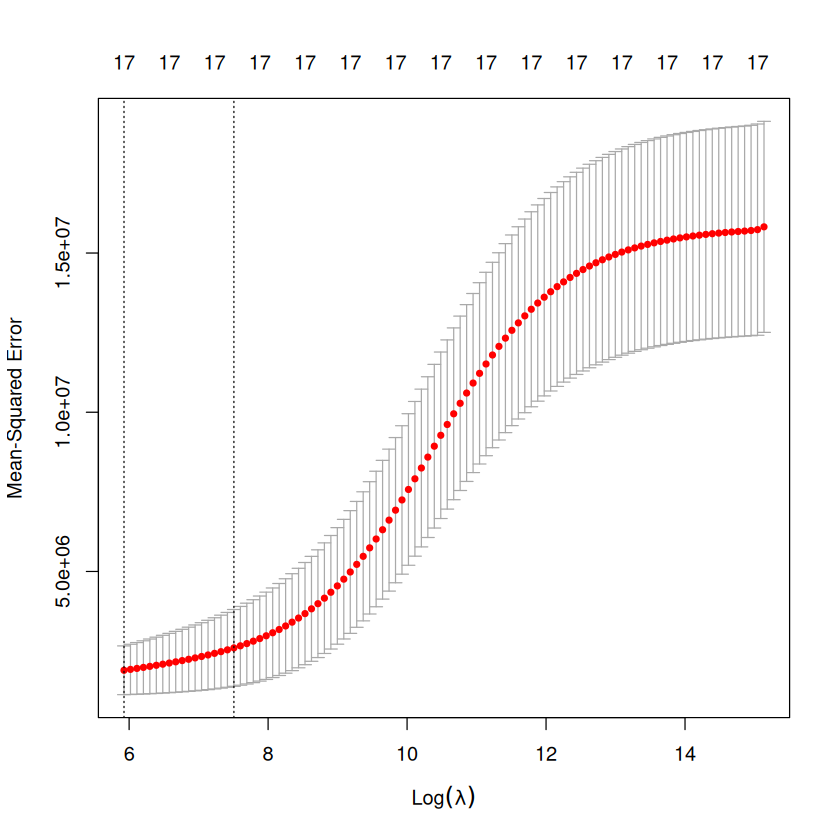

In [16]:
cv_ridge <- cv.glmnet(x_train, y_train, alpha = 0)
plot(cv_ridge)

The parameter $\lambda$ controls the penalty applied to the model:

$$
\sum_{i = 1}^{n}\left(y_i - \beta_0 - \sum_{j = 1}^{p}\beta_j x_{ij} \right)^2 + \lambda \sum_{j = 1}^{p} \beta_j^2 = RSS + \lambda \sum_{j = 1}^{p} \beta_j^2 
$$

$\quad$ where the second term, $\lambda \sum_{j = 1}^{p} \beta_j^2$, is known as the `shrinkage penalty`.

When $\lambda = 0$, the penalty has no effect, and the equation reduces to the model fitted using least squares. In contrast, when $\lambda \rightarrow \infty$, the coefficients shrink to zero, corresponding to the null model.

In [17]:
cat("Valor mínimo de lambda:", cv_ridge$lambda.min, log(cv_ridge$lambda.min))

Valor mínimo de lambda: 374.7353 5.92622

The minimum value of $\lambda$ is reached approximately when $\log(\lambda) \approx 6$, resulting in minimal penalization and a model close to the one fitted using least squares. However, since the goal is to minimize the prediction error on the test set, a value of $\lambda$ near $\log(\lambda) \approx 8$ was chosen. This value simplifies the model by reducing the coefficients, leading to improved generalization on new data.

In [18]:
cat("Valor óptimo de lambda:", cv_ridge$lambda.1se, log(cv_ridge$lambda.1se))

Valor óptimo de lambda: 1822.189 7.507794

In [19]:
best_lambda <- cv_ridge$lambda.1se # choosen lambda value

In [20]:
predictions <- predict(ridge_model, s = best_lambda, newx = x_test) # calculate predictions using the choosen lambda value

In [21]:
ridge_test_error <- mean((y_test - predictions)^2) # test error

In [22]:
cat("Error de prueba obtenido (Regresión Ridge):", ridge_test_error)

Error de prueba obtenido (Regresión Ridge): 1106708

### Fitting a Lasso Regression Model

In [23]:
lasso_model <- glmnet(x_train, y_train, alpha = 1) # lasso regression model; alpha parameter specifies lasso penalty

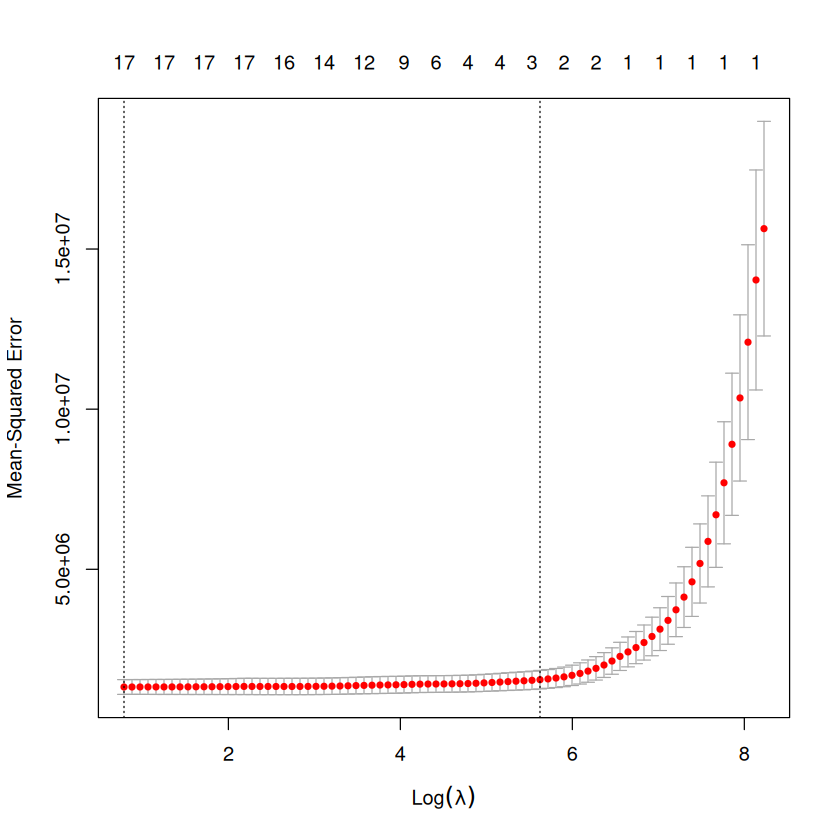

In [24]:
cv_lasso <- cv.glmnet(x_train, y_train, alpha = 1)
plot(cv_lasso)

As in Ridge regression, the parameter $\lambda$ controls the intensity of the penalty. In this case, the function that is minimized in Lasso regression is:

$$
\sum_{i = 1}^{n}\left(y_i - \beta_0 - \sum_{j = 1}^{p}\beta_j x_{ij} \right)^2 + \lambda \sum_{j = 1}^{p} |\beta_j| = RSS + \lambda \sum_{j = 1}^{p} |\beta_j| 
$$

$\quad$ where in the penalty term, $\beta_j^2$ is replaced by $|\beta_j|$.

Similarly, when $\lambda = 0$, the model is simply fitted using least squares, and when $\lambda \rightarrow \infty$, the model reduces to the null model, where all coefficients are equal to zero.

In [25]:
cat("Valor mínimo de lambda:", cv_lasso$lambda.min, log(cv_lasso$lambda.min))

Valor mínimo de lambda: 2.194833 0.7861058

In [26]:
lasso_coef <- predict(lasso_model, type = "coefficients", s = cv_lasso$lambda.min)[1:17,]

In [27]:
cat("Coeficientes/Estimaciones diferentes de 0:", length(lasso_coef[lasso_coef != 0]))

Coeficientes/Estimaciones diferentes de 0: 17

In [28]:
cat("Valor óptimo de lambda:", cv_lasso$lambda.1se, log(cv_lasso$lambda.1se))

Valor óptimo de lambda: 276.9565 5.62386

In [29]:
lasso_coef <- predict(lasso_model, type = "coefficients", s = cv_lasso$lambda.1se)[1:17,]

In [30]:
cat("Coeficientes/Estimaciones diferentes de 0:", length(lasso_coef[lasso_coef != 0]))

Coeficientes/Estimaciones diferentes de 0: 4

A value of $\lambda$ close to $\log(\lambda) \approx 6$ was chosen. Although this value does not minimize the MSE, it significantly reduces the number of predictors, which improves the model's interpretability and its ability to generalize to unseen data. Moreover, the increase in MSE is minimal compared to the error obtained with the minimum $\lambda$ value.

In [31]:
best_lambda <- cv_lasso$lambda.1se # choosen lambda value

In [32]:
predictions <- predict(lasso_model, s = best_lambda, newx = x_test) # calculate predictions using the choosen lambda value

In [33]:
lasso_test_error <- mean((y_test - predictions)^2) # test error

In [34]:
cat("Error de prueba obtenido (Regresión Lasso):", lasso_test_error)

Error de prueba obtenido (Regresión Lasso): 854761.4

### Fitting a Principal Component Regression (PCR) Model

In [35]:
pcr_model <- pcr(Apps ~ ., data = train, scale = TRUE, validation = 'CV') # define a principal components regression model

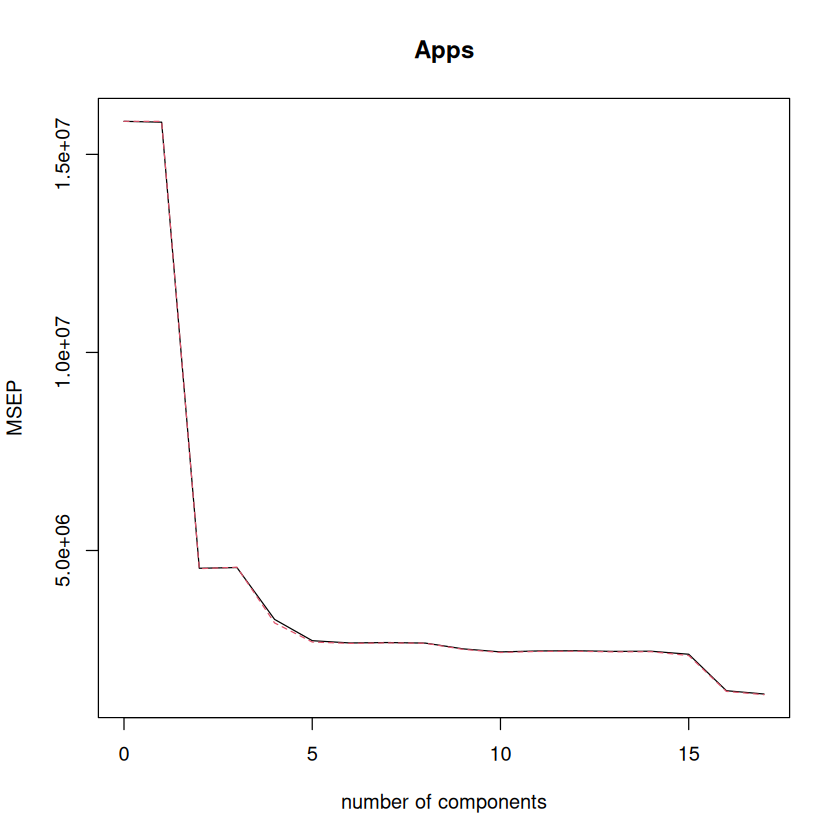

In [36]:
validationplot(pcr_model, val.type = 'MSEP') # plot the mean squared error of prediction (MSEP)

We observe that, starting from 5 components, the model does not show a significant improvement in its predictive ability. Including more than 5 components would not be advisable, as it would only unnecessarily increase the complexity. A model with approximately 3-5 components is optimal for this case.

In [37]:
predictions <- predict(pcr_model, test, ncomp = 5) # calculate predictions using M = 5

In [38]:
pcr_test_error <- mean((test$Apps - predictions)^2) # test error

In [39]:
cat("Error de prueba obtenido (PCR):", pcr_test_error)

Error de prueba obtenido (PCR): 1889150

### Fitting a Partial Least Squares (PLS) Model

In [40]:
pls_model <- plsr(Apps ~ ., data = train, scale = TRUE, validation = 'CV') # define a partial least squares regression model

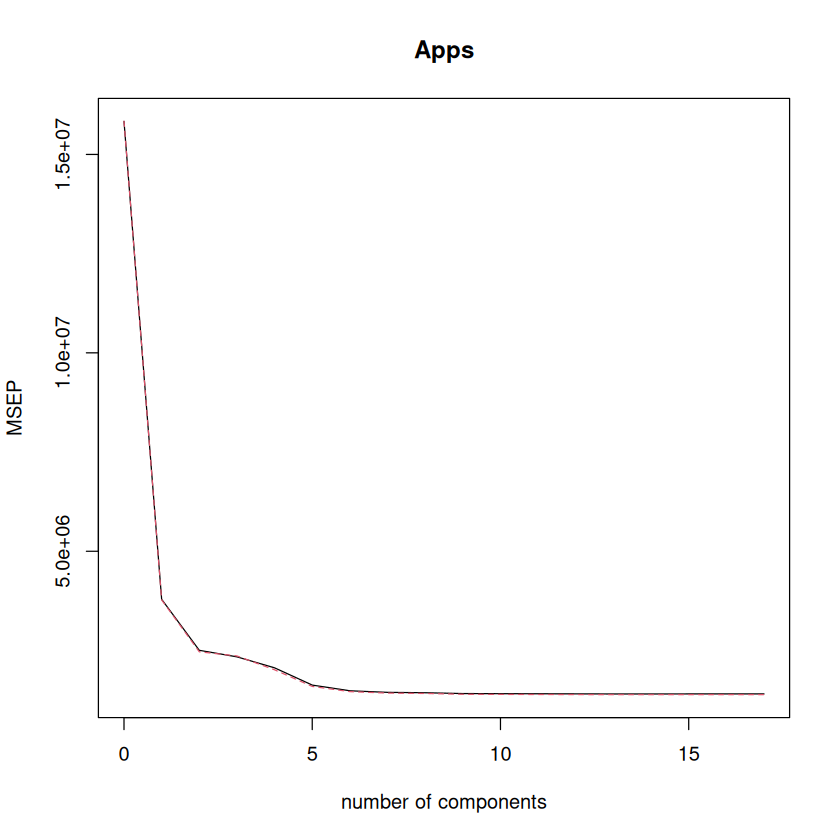

In [41]:
validationplot(pls_model, val.type = 'MSEP') # plot the mean squared error of prediction (MSEP)

Initially, increasing the number of components improves the model's prediction ability and reduces the test error. However, between 5 and 7 components, the test error stabilizes, and no significant further reduction is observed. Therefore, in this PLS model, selecting M = 6 components would be optimal, avoiding unnecessary complexity increase.

In [42]:
predictions <- predict(pls_model, test, ncomp = 6) # calculate predictions using M = 6 

In [43]:
pls_test_error <- mean((test$Apps - predictions)^2) # test error

In [44]:
cat("Error de prueba obtenido (PLS):", pls_test_error)

Error de prueba obtenido (PLS): 870684.1

### Test Error Comparison Across Models

In [45]:
test_errors <- c(ols_test_error, ridge_test_error, lasso_test_error, pcr_test_error, lasso_test_error) # test error obtained
models <- c('OLS', 'Ridge Reg', 'Lasso Reg', 'PCR', 'PLS') # models fitted

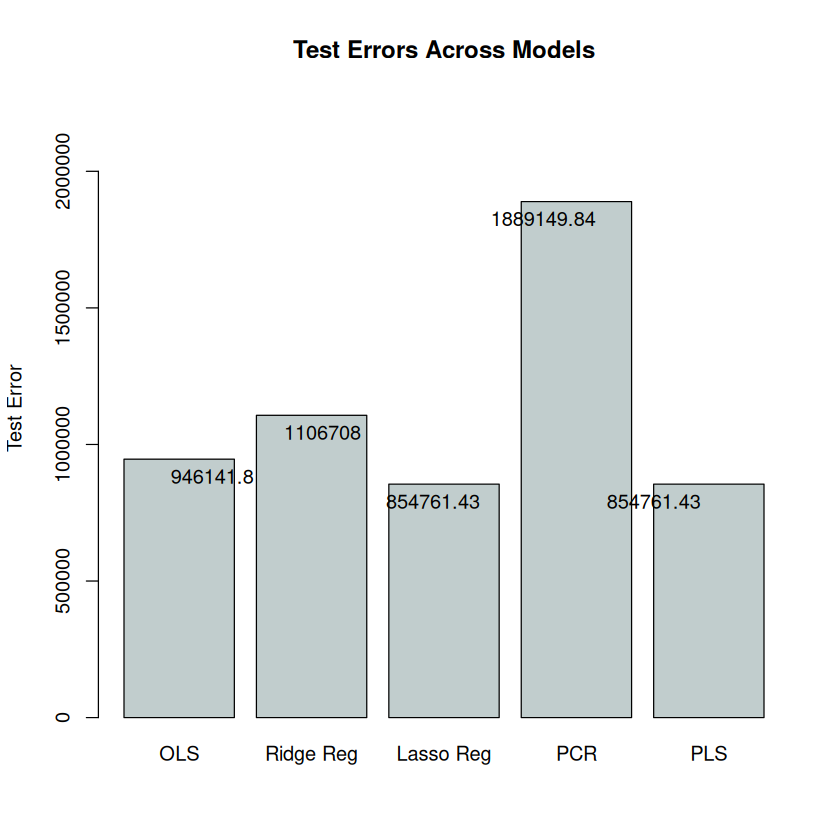

In [65]:
barplot(test_errors, names.arg = models, main = 'Test Errors Across Models',
        ylab = 'Test Error', col = 'Azure 3', ylim = c(0, max(test_errors) * 1.2))

text(x = seq_along(test_errors), y = test_errors, label = round(test_errors, 2), pos = 1) # show test error for each bar

The **Lasso regression** model shows the lowest test error, followed by the PLS model and the least squares model. This suggests that, in this specific case, using these models improves prediction accuracy compared to the model fitted by least squares. On the other hand, the Ridge regression and PCR models have higher test errors than the OLS model, making them less recommended for this particular case.

It is important to note that, in each case, the highest number of components or the minimum value of $\lambda$ was avoided, as this would result in models very similar to the OLS-fitted model, making the comparison irrelevant.

### Model Proposed 

Based on the previous results, I would recommend using a `Lasso Regression` model with a value of $\lambda \approx 276.9$, as it shows a lower test error compared to the model fitted by least squares. This shrinkage method significantly reduces the variance of the coefficients and decreases the number of variables, which contributes to the interpretability of the model. In contrast to the Ridge regression and PCR models, which include all predictors in their components, making interpretation more difficult.

In [71]:
cat("Error de prueba obtenido mediante el modelo de regresión Lasso:", lasso_test_error)

Error de prueba obtenido mediante el modelo de regresión Lasso: 854761.4

In this case, the proposed model includes only 3 predictors, in addition to the intercept (non-zero estimates). The predictors considered are: **Accept** (number of accepted applications), **Top10perc** (percentage of new students in the top 10% of their class), and **Expend** (educational expenditure per student).

In [70]:
cat("No. de predictores incluidos en el modelo:", length(lasso_coef[lasso_coef != 0]))

No. de predictores incluidos en el modelo: 4

In [74]:
lasso_coef[lasso_coef != 0] # coefficient estimates and their respective predictors

(Intercept)        Accept     Top10perc        Expend 
-3.991625e+02  1.370266e+00  2.289213e+01  4.418472e-03

By analyzing the predictors of this model, we can infer that these variables capture relevant aspects of the data. A high number of accepted applications (**Accept**) could make the institution more attractive to future applicants, increasing the number of received applications. Additionally, a high percentage of high-performing students (**Top10perc**) could reflect the institution's educational quality, attracting more interested applicants. Lastly, higher spending per student (**Expend**) could be associated with more resources and better facilities, increasing the institution's appeal to applicants.

### Exercise 2.0

It is well known that Ridge regression tends to give similar coefficient values to correlated variables, while Lasso may give entirely different coefficient values to correlated variables. Now, let's explore this property in a simple setting.

Suppose that $n = 2, p = 2, x_{11} = x_{12}, x_{21} = x_{22}$. Additionally, assume that $y_1 + y_2 = 0$ y $x_{11} + x_{21} = 0$ y $x_{12} + x_{22} = 0$, so the estimate for the intercept in a least squares model, Ridge regression, or Lasso is zero: $\hat{\gamma} = 0$.

- Formulate the optimization problem for Ridge regression under these assumptions.
- Argue that under these assumptions, the Ridge coefficient estimates satisfy $\hat{\beta}_1 = \hat{\beta}_2$.
- Formulate the optimization problem for Lasso regression under these assumptions.
- Argue that in this context, the Lasso coefficients $\hat{\beta}_1$ y $\hat{\beta}_2$ are not unique; that is, there are many possible solutions to the optimization problem in (c). Describe these solutions.

### Ridge Regression Optimization Problem

The estimators of the coefficients in Ridge regression are those values that aim to minimize:

$$
\sum_{i = 1}^{n}\left( y_i - \beta_0 - \sum_{j = 1}^{p} \beta_j x_{ij} \right)^2 + \lambda \sum_{j = 1}^{p} \beta_{j}^{2} = RSS + \lambda \sum_{j = 1}^{p} \beta_j^2
$$

$\quad$ where the second term, $\lambda \sum_{j = 1}^{p} \beta_j^2$, is known as the `shrinkage penalty`.

Considering $n = p = 2$.

$$
\sum_{i = 1}^{2}\left( y_i - \hat{\beta}_0 - \sum_{j = 1}^{2} \hat{\beta}_j x_{ij} \right)^2 + \lambda \sum_{j = 1}^{2} \hat{\beta}_{j}^{2}
$$

$$
(y_1 - \hat{\beta}_{1}x_{11} - \hat{\beta}_{2}x_{12})^2 + (y_2 - \hat{\beta}_{1}x_{21} - \hat{\beta}_{2}x_{22})^2 + \lambda(\hat{\beta}_1^2 + \hat{\beta}_2^2)
$$

Given that $x_{11} = x_{12}, x_{21} = x_{22}$.

$$
(y_1 - (\hat{\beta}_1x_{11} + \hat{\beta}_2x_{11}))^2 + (y_2 - (\hat{\beta}_1x_{22} + \hat{\beta}_2x_{22}))^2 + \lambda(\hat{\beta}_1^2 + \hat{\beta}_2^2)
$$

Given that the optimization problem consists of minimizing the equation:

$$
min\left[(y_1 - (\hat{\beta}_1x_{11} + \hat{\beta}_2x_{11}))^2 + (y_2 - (\hat{\beta}_1x_{22} + \hat{\beta}_2x_{22}))^2 + \lambda(\hat{\beta}_1^2 + \hat{\beta}_2^2) \right],
$$

the partial derivatives with respect to $\hat{\beta_1}$ and $\hat{\beta_2}$ are calculated and set equal to $0$ to find the critical points.

We expand the squared terms:

$$
(y_1 - (\hat{\beta}_1x_{11} + \hat{\beta}_2x_{11}))^2 = y_1^2 - 2y_1(\hat{\beta}_{1}x_{11} + \hat{\beta}_{2}x_{11}) + \hat{\beta}_{1}^2 x_{11}^2 + 2 \hat{\beta}_{1} \hat{\beta}_{2} x_{11}^2 + \hat{\beta}_{2}^2 x_{11}^2 
$$

$$
(y_2 - (\hat{\beta}_1x_{22} + \hat{\beta}_2x_{22}))^2 = y_2^2 - 2y_2(\hat{\beta}_{1}x_{22} + \hat{\beta}_{2}x_{22}) + \hat{\beta}_{1}^2 x_{22}^2 + 2 \hat{\beta}_{1} \hat{\beta}_{2} x_{22}^2 + \hat{\beta}_{2}^2 x_{22}^2
$$

We calculate the partial derivative with respect to $\hat{\beta}_1$.

$$
-2y_1 x_{11} - 2y_2 x_{22} + 2\hat{\beta}_1x_{11}^{2} + 2\hat{\beta}_1x_{22}^{2} + 2\hat{\beta}_2x_{11}^2 + 2\hat{\beta}_2x_{22}^2 + 2\hat{\beta}_1\lambda
$$

$$
-2y_1 x_{11} - 2y_2 x_{22} + 2 \hat{\beta}_1 (x_{11}^2 + x_{22}^2 + \lambda) + 2 \hat{\beta}_2 (x_{11}^2 + x_{22}^2) = 0
$$

We calculate the partial derivative with respect to $\hat{\beta}_2$.

$$
-2y_1 x_{11} - 2y_2 x_{22} + 2\hat{\beta}_2x_{11}^{2} + 2\hat{\beta}_2x_{22}^{2} + 2\hat{\beta}_1x_{11}^2 + 2\hat{\beta}_1x_{22}^2 + 2\hat{\beta}_2\lambda
$$

$$
-2y_1 x_{11} - 2y_2 x_{22} + 2 \hat{\beta}_2 (x_{11}^2 + x_{22}^2 + \lambda) + 2 \hat{\beta}_1 (x_{11}^2 + x_{22}^2) = 0
$$

Given that:

$$
2y_1 x_{11} + 2y_2 x_{22} = 2 \hat{\beta}_1 (x_{11}^2 + x_{22}^2 + \lambda) + 2 \hat{\beta}_2 (x_{11}^2 + x_{22}^2)
$$

$\qquad$ and

$$
2y_1 x_{11} + 2y_2 x_{22} = 2 \hat{\beta}_2 (x_{11}^2 + x_{22}^2 + \lambda) + 2 \hat{\beta}_1 (x_{11}^2 + x_{22}^2)
$$

Then:

$$
2 \hat{\beta}_1 (x_{11}^2 + x_{22}^2 + \lambda) + 2 \hat{\beta}_2 (x_{11}^2 + x_{22}^2) = 2 \hat{\beta}_2 (x_{11}^2 + x_{22}^2 + \lambda) + 2 \hat{\beta}_1 (x_{11}^2 + x_{22}^2)
$$

From the previous equation, it can be observed that:

$$
2\hat{\beta}_1\lambda = 2\hat{\beta}_2\lambda
$$

$$
\hat{\beta_1} = \hat{\beta_2}
$$

### Lasso Regression Optimization Problem

The estimators of the coefficients in Lasso regression aim to minimize the equation:

$$
\sum_{i = 1}^{n}\left(y_i - \beta_0 - \sum_{j = 1}^{p}\beta_j x_{ij} \right)^2 + \lambda \sum_{j = 1}^{p} |\beta_j| = RSS + \lambda \sum_{j = 1}^{p} |\beta_j| 
$$

$\quad$ where in the penalty term, $\beta_j^2$ is replaced by $|\beta_j|$.

Considering $n = p = 2$.

$$
\sum_{i = 1}^{2}\left( y_i - \hat{\beta}_0 - \sum_{j = 1}^{2} \hat{\beta}_j x_{ij} \right)^2 + \lambda \sum_{j = 1}^{2} \hat{|\beta_j|}
$$

$$
(y_1 - \hat{\beta}_{1}x_{11} - \hat{\beta}_{2}x_{12})^2 + (y_2 - \hat{\beta}_{1}x_{21} - \hat{\beta}_{2}x_{22})^2 + \lambda(|\hat{\beta}_1| + |\hat{\beta}_2|)
$$

Given that $x_{11} = x_{12}, x_{21} = x_{22}$.

$$
(y_1 - (\hat{\beta}_1x_{11} + \hat{\beta}_2x_{11}))^2 + (y_2 - (\hat{\beta}_1x_{22} + \hat{\beta}_2x_{22}))^2 + \lambda(|\hat{\beta}_1| + |\hat{\beta}_2|)
$$

The optimization problem consists of minimizing the equation:

$$
min\left[(y_1 - (\hat{\beta}_1x_{11} + \hat{\beta}_2x_{11}))^2 + (y_2 - (\hat{\beta}_1x_{22} + \hat{\beta}_2x_{22}))^2 + \lambda(|\hat{\beta}_1| + |\hat{\beta}_2|) \right]
$$

Considering the following formulation for Lasso regression:

$$
min \Biggl\{ (y_1 - (\hat{\beta}_1x_{11} + \hat{\beta}_2x_{11}))^2 + (y_2 - (\hat{\beta}_1x_{22} + \hat{\beta}_2x_{22}))^2 \Biggl\} ~\text{subject to}~ |\hat{\beta}_1| + |\hat{\beta}_2| \leq s
$$

Geometrically, the Lasso constraint has the shape of a diamond centered at the origin of the plane, intersecting the axes at a distance $s$ from the origin.

Considering that $y_2 = - y_1$ and $x_{22} = - x_{11}$, we rewrite the equation as follows:

$$
(y_1 - (\hat{\beta}_1x_{11} + \hat{\beta}_2x_{11})^2 + (-y_1 - \hat{\beta}_1(-x_{11}) - \hat{\beta}_2(-x_{11}))^2
$$

$$
(y_1 - (\hat{\beta}_1x_{11} + \hat{\beta}_2x_{11})^2 + (y_1 - (\hat{\beta}_1 + \hat{\beta}_2)x_{11})^2
$$

$$
(y_1 - (\hat{\beta}_1x_{11} + \hat{\beta}_2x_{11})^2 + (y_1 - (\hat{\beta}_1x_{11} + \hat{\beta}_2x_{11})^2 = 2[y_1 - (\hat{\beta}_1x_{11} + \hat{\beta}_2x_{11})]^2
$$

We must minimize the expression:

$$
2[y_1 - (\hat{\beta}_1x_{11} + \hat{\beta}_2x_{11})]^2 \geq 0
$$

Given the obtained expression, we can see that it is always greater than or equal to $0$. Therefore, the optimal solution will be found when

$$
2[y_1 - (\hat{\beta}_1x_{11} + \hat{\beta}_2x_{11})]^2 = 0
$$

Expressing the equation in the following way:

$$
2[y_1 - (\hat{\beta}_1 + \hat{\beta}_2)x_{11}]^2 = 0
$$

We can see that the solution occurs when $\hat{\beta}_1 + \hat{\beta}_2 = \frac{y_1}{x_{11}}$.

This solution $\hat{\beta}_1 + \hat{\beta}_2 = \frac{y_1}{x_1}$ suggests that there are multiple solutions for the coefficients $\hat{\beta}_1$ and $\hat{\beta}_2$. Since the equation only imposes a restriction on the sum of $\hat{\beta}_1$ and $\hat{\beta}_2$, it does not establish individual values for each coefficient. That is, the relationship that describes the solution is a linear equation between $\hat{\beta}_1$ and $\hat{\beta}_2$, and any pair of values for $\hat{\beta}_1$ and $\hat{\beta}_2$ that sum to $\frac{y_1}{x_1}$ can be a valid solution.

***

MSc Statistical Computing by Mathematics Research Center (CIMAT Monterrey)

November 2024